In [1]:
# Tratamiento de datos
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', None)
import pickle

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,8)

from scipy import stats
import math

#normalización
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#estandarización 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

#encoders
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

#metrics
from sklearn import metrics

# warnings
import warnings
warnings.filterwarnings('ignore')

#scr
import sys
sys.path.append("../")
import src.support as sp

# input

In [2]:
df = pd.read_csv('../data/train.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983
3,3,1.08,Very Good,G,SI2,63.2,57.0,6.54,6.50,4.12,8.371
4,4,0.36,Premium,G,VS1,62.3,59.0,4.50,4.55,2.82,6.588


# EDA
1. ver que tengo en el df y los tipos 

_________________________________

1_Estructura de los datos: (40455, 11)


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


None

_________________________________

2_Número de filas duplicadas:
0
_________________________________



,nulos,dtypes
id,0,int64
carat,0,float64
cut,0,object
color,0,object
clarity,0,object
depth,0,float64
table,0,float64
x,0,float64
y,0,float64
z,0,float64


_________________________________

3_Descripción de las variables tipo Numéricas:


,count,mean,std,min,25%,50%,75%,max
id,40455.0,20227.000000,11678.496907,0.000,10113.500,20227.00,30340.500,40454.000
carat,40455.0,0.797576,0.475939,0.200,0.400,0.70,1.040,5.010
depth,40455.0,61.746377,1.436796,43.000,61.000,61.80,62.500,79.000
table,40455.0,57.451694,2.234569,44.000,56.000,57.00,59.000,95.000
x,40455.0,5.729163,1.125244,0.000,4.710,5.69,6.540,10.740
y,40455.0,5.732896,1.154799,0.000,4.720,5.70,6.540,58.900
z,40455.0,3.537351,0.711002,0.000,2.910,3.52,4.030,31.800
price,40455.0,7.783822,1.016828,5.787,6.851,7.78,8.581,9.842


_________________________________

4_Descripción de las variables tipo Categóricas:


,count,unique,top,freq
cut,40455,5,Ideal,16230
color,40455,7,G,8410
clarity,40455,8,SI1,9779


_________________________________

5_Distribución variables pairplot:
_________________________________



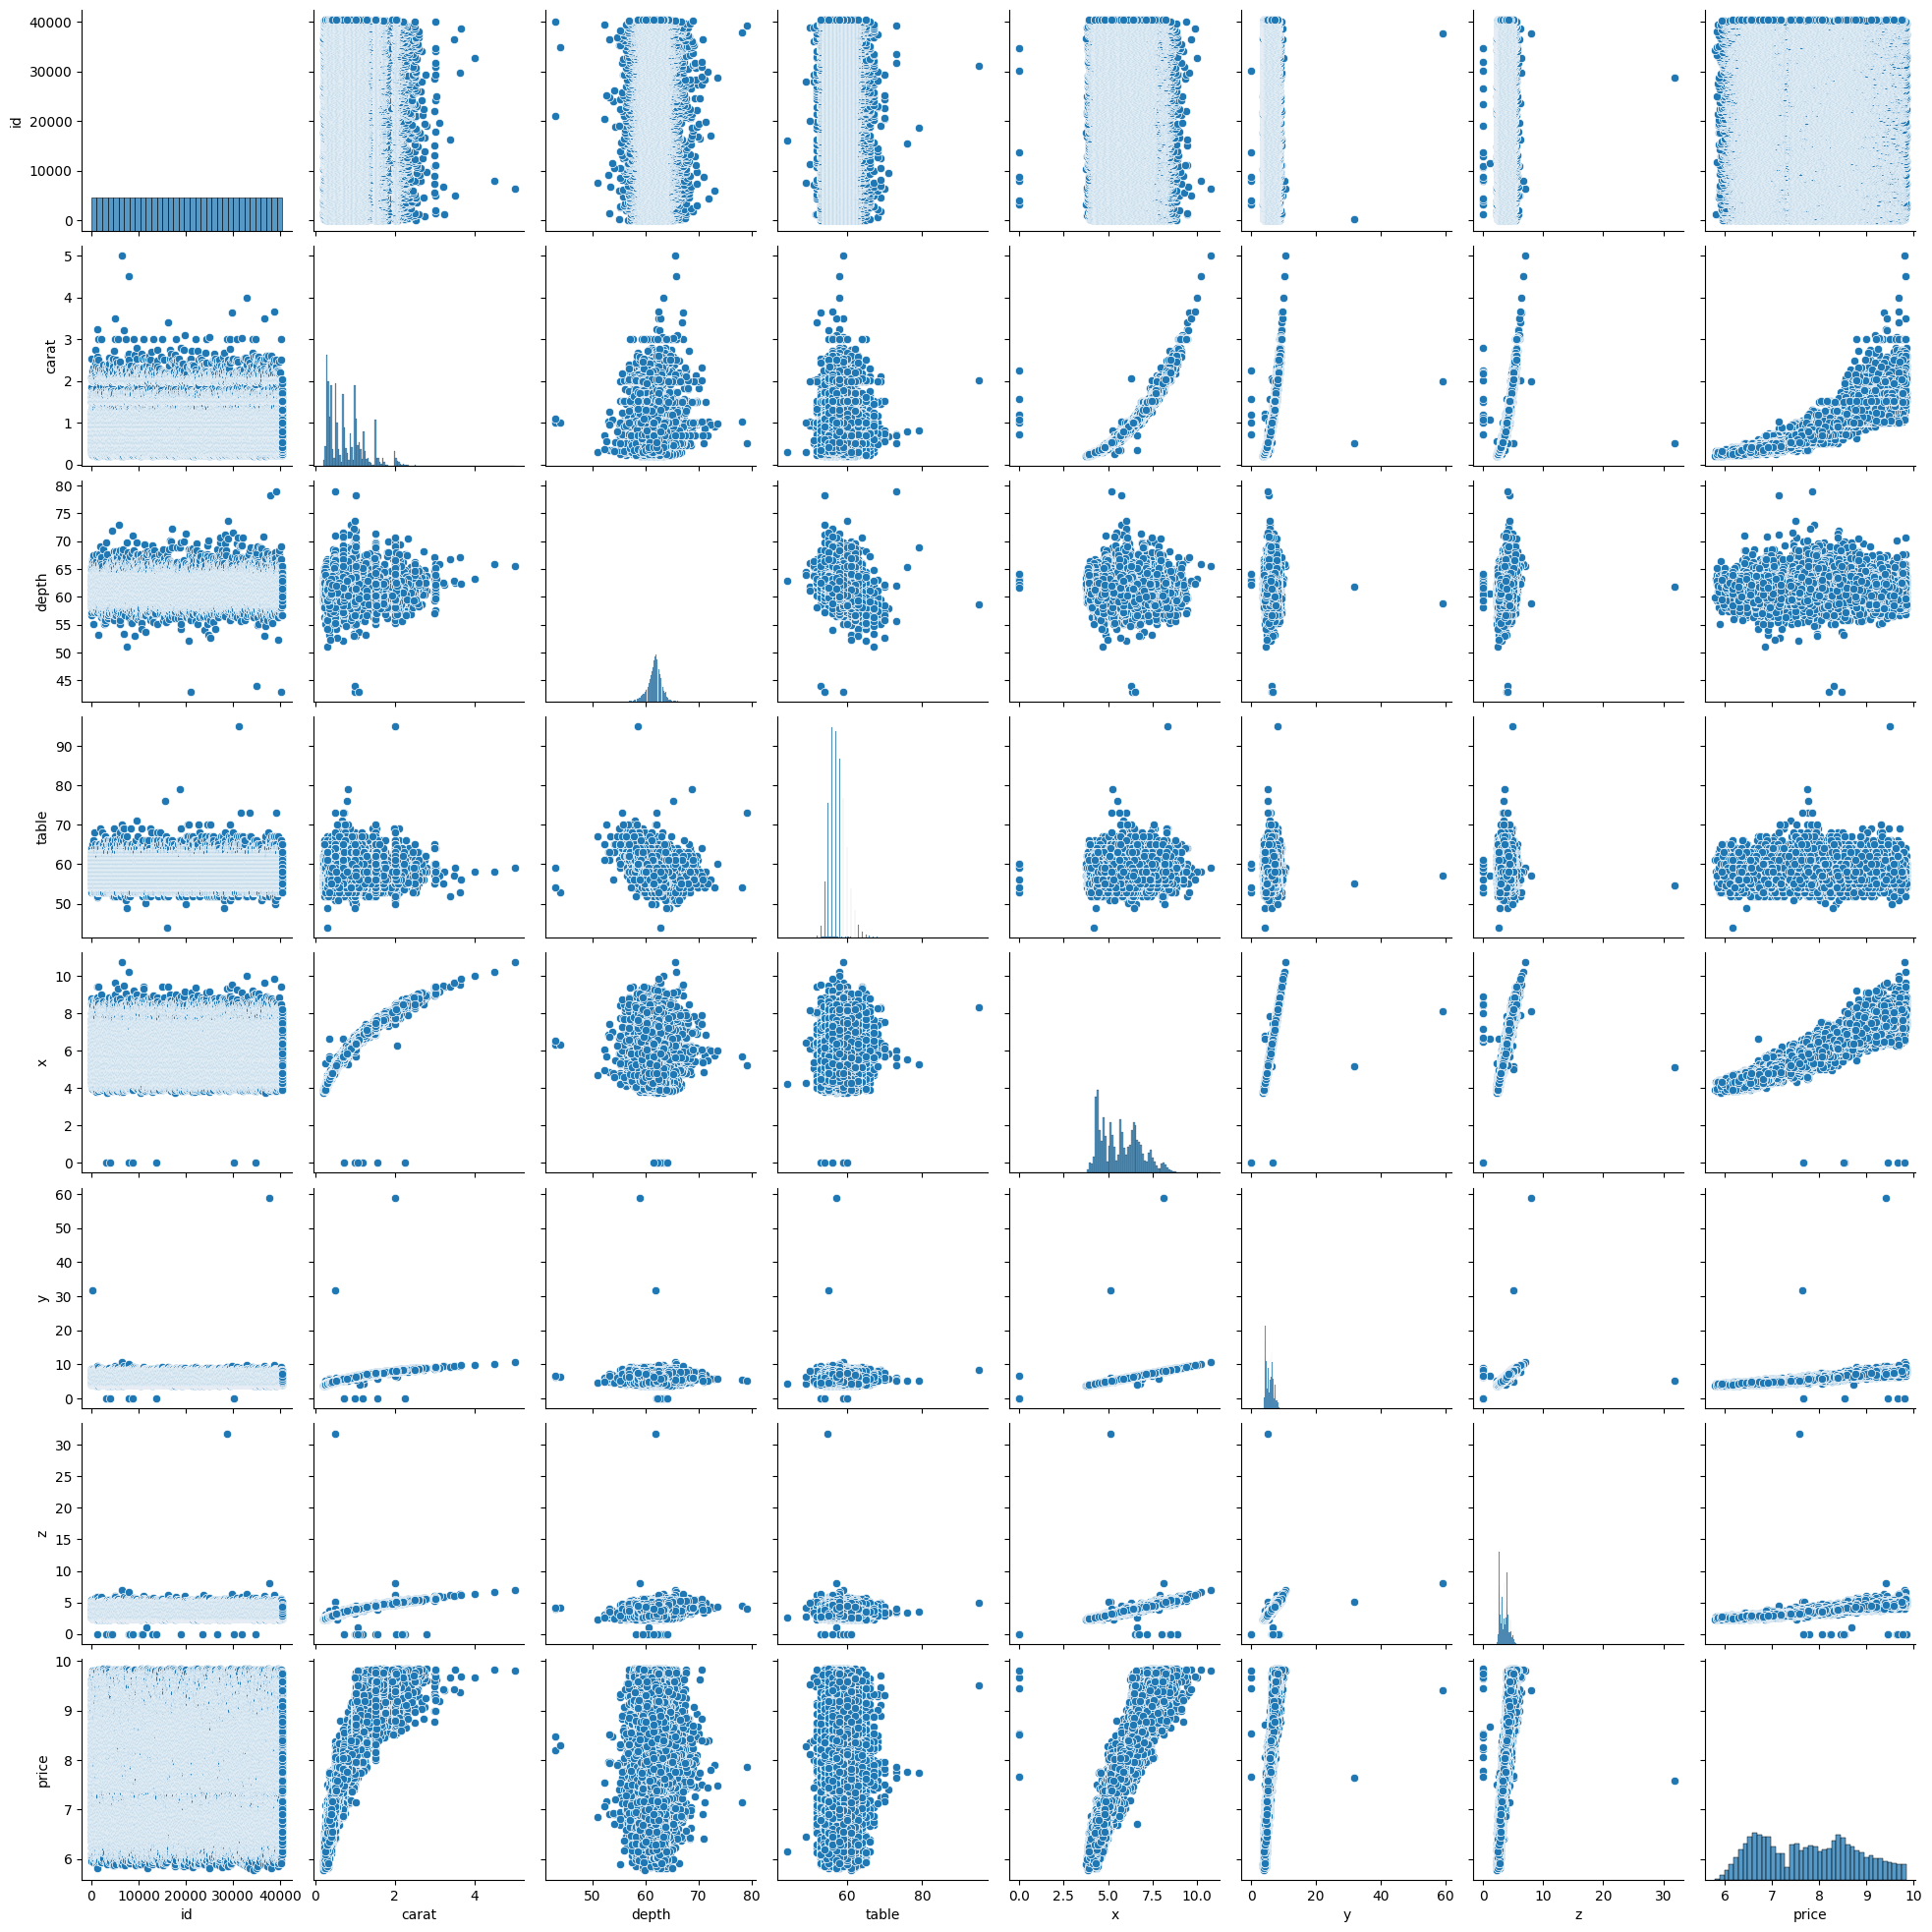

In [3]:
sp.analisis_basico(df)

**variables:**
- `id`: only for test & sample submission files, id for prediction sample identification
- `price`: price in USD
- `carat`: weight of the diamond
- `cut`: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- `color`: diamond colour
- `clarity`: a measurement of how clear the diamond is
- `x`: length in mm
- `y`: width in mm
- `z`: depth in mm
- `depth`: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- `table`: width of top of diamond relative to widest point (43--95)

las variables `x`, `y`, `z` están relacionadas con `depth` y `table`, por lo que las podemos eliminar. 

las variables que quedan en el dataset serían las sigueintes:
- variable respuesta:
    - `price`
- variables numéricas:
    - `carat`
    - `depth`
    - `table`
- variables categóricas:
    - `clarity`
    - `cut`
    - `color`

4. check de las distribuciones con un pairplot

In [ ]:
sns.pairplot(data=df);

## variable respuesta

In [ ]:
# cuantas casas tienen de media el valor que indica el eje x
sns.histplot(data = df, x = 'price', kde = True)

mirando la cariable respuesta, no es normal.

## variables predictoras
### variables numéricas

In [ ]:
df_numericas = df.select_dtypes(include = np.number)
df_numericas.head()

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
axes = axes.flat
columnas = df_numericas.drop(['price', 'id'], axis = 1)
for i, columns in enumerate(columnas.columns):
    sns.regplot(data = df, 
        x = columns, 
        y = 'price', 
        ax = axes[i],
        color = 'gray',
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "red", "alpha": 0.7 }
        )
fig.tight_layout()

la única que está verdaderamente relacionada con el precio es `carat`. Lo revisaremos con el heatmap para ver la correlación

## correlación de las variables

In [ ]:
sns.heatmap(df.corr(), 
           cmap = "YlGnBu",
           annot = True);

## variables categóricas

In [ ]:
columns_cate = df.select_dtypes(include = 'object').columns

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
axes = axes.flat
columns_cate = df.select_dtypes(include = 'object').columns
for i, columns in enumerate(columns_cate):
    df_cat = df.groupby(columns)['price'].median().reset_index()
    sns.barplot(data = df_cat, 
        x = columns, 
        y = 'price',
        ax = axes[i]
        )
fig.tight_layout()

las variables categóricas vemos que no parecen tener orden.

# gestión de nulos

In [ ]:
# Número de datos nulos por columna

df.isnull().sum() / df.shape[0]

# gestión de outliers

In [ ]:
fig, ax = plt.subplots(10, 1, figsize=(12,7))

df_numericas.drop(['id'], axis = 1, inplace = True)

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
plt.tight_layout()
plt.show();

hay outliers en las columnas de `carat`, `depth` y `table`.

# normalización
## logarítmica

In [ ]:
df['price_LOG'] = df['price'].apply(lambda x: np.log(x) if x != 0 else 0)

In [ ]:
fig, axes = plt.subplots(1, 4, figsize = (20,5))

axes[0].set_title('price original')
axes[1].set_title('price logaritmica')
axes[2].set_title('charges normalizado (non-smoker sin outliers)')
axes[3].set_title('charges normalizado (smoker sin outliers)')

sns.distplot(df['charges'] ,ax = axes[0])
sns.distplot(df_mayor_Q3['charges_LOG'], ax = axes[1])
sns.distplot(df_smoker['charges_LOG'], ax = axes[2])
sns.distplot(df_non_smoker['charges_LOG'], ax = axes[3])
fig.tight_layout();

In [ ]:
print('original mayor Q3', stats.shapiro(df_mayor_Q3["charges"]), '\n mayor Q3 log:', stats.shapiro(df_mayor_Q3["charges_LOG"]), 
      '\n original menor Q3', stats.shapiro(df_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_smoker["charges_LOG"]),
      '\n original menor Q3', stats.shapiro(df_non_smoker["charges"]), '\n menor Q3 log:', stats.shapiro(df_non_smoker["charges_LOG"]),
)

# estandarización

# encoding